### 의사결정나무
- 데이터 분류 및 회귀에 사용되는 지도학습 알고리즘  
  - 장점: 대/소를 구분하는 것이므로 표준화를 할 필요가 없음   
  - 단점: 학습 데이터에 과대적합되는 경향이 있음  
    - randomForest로 보완

In [1]:
import pandas as pd
import numpy as np

1. 문제정의
   - 서울 지역 (구)의 경도와 위도 정보를 사용하여 임의의 입력된 지역 (동)을 강남, 강북, 강동, 강서로 분류

In [2]:
train_df = pd.read_csv('../Data/seoul_district.csv')
train_df.head()

,district,longitude,latitude,label
0,강서구,126.849500,37.551000,강서
1,양천구,126.855396,37.524240,강서
2,구로구,126.887400,37.495400,강서
3,금천구,126.902000,37.451900,강서
4,마포구,126.908728,37.560229,강서


In [4]:
test_df = pd.read_csv('../Data/seoul_dong.csv')
test_df.head()

,dong,longitude,latitude,label
0,개봉동,126.854547,37.489853,강서
1,고척동,126.859245,37.501394,강서
2,화곡동,126.847951,37.537759,강서
3,방화동,126.815719,37.575817,강서
4,상암동,126.891620,37.577039,강서


In [7]:
# 레이블의 개수 확인
train_df.label.value_counts()

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64

In [8]:
test_df.label.value_counts()

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64

In [9]:
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


In [10]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import seaborn as sns

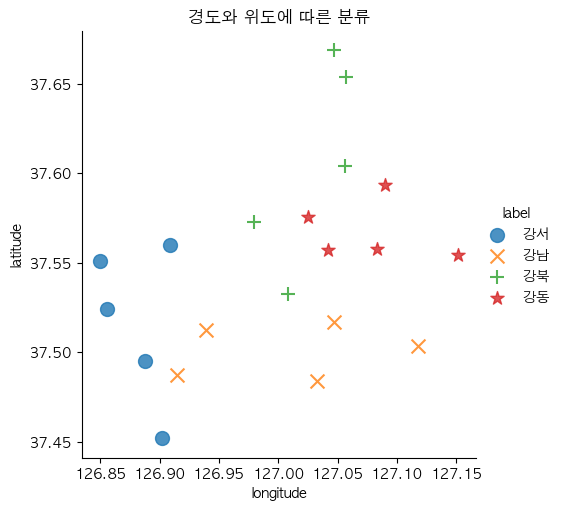

In [18]:
sns.lmplot(
    x='longitude',
    y='latitude',
    data=train_df,
    fit_reg=False,
    markers=['o','x','+','*'],
    scatter_kws={'s':100},
    hue='label'
)
plt.title('경도와 위도에 따른 분류')
plt.show()

- 데이터 다듬기

In [19]:
train_df.drop(columns='district',axis=1,inplace=True)

In [20]:
test_df.drop(columns='dong',axis=1,inplace=True)

In [21]:
train_df.head()

,longitude,latitude,label
0,126.849500,37.551000,강서
1,126.855396,37.524240,강서
2,126.887400,37.495400,강서
3,126.902000,37.451900,강서
4,126.908728,37.560229,강서


In [22]:
test_df.head()

,longitude,latitude,label
0,126.854547,37.489853,강서
1,126.859245,37.501394,강서
2,126.847951,37.537759,강서
3,126.815719,37.575817,강서
4,126.891620,37.577039,강서


In [23]:
x_train = train_df.iloc[:,:2]
x_train

,longitude,latitude
0,126.849500,37.551000
1,126.855396,37.524240
2,126.887400,37.495400
3,126.902000,37.451900
4,126.908728,37.560229
5,126.915065,37.487517
6,126.939300,37.512400
7,127.032400,37.483700
8,127.047300,37.517200
9,127.117898,37.503510


In [24]:
y_train = train_df.iloc[:,2]
y_train

0     강서
1     강서
2     강서
3     강서
4     강서
5     강남
6     강남
7     강남
8     강남
9     강남
10    강북
11    강북
12    강북
13    강북
14    강북
15    강동
16    강동
17    강동
18    강동
19    강동
Name: label, dtype: object

In [25]:
x_test = test_df.iloc[:,:2]
x_test

,longitude,latitude
0,126.854547,37.489853
1,126.859245,37.501394
2,126.847951,37.537759
3,126.815719,37.575817
4,126.891620,37.577039
5,127.030720,37.508838
6,127.057193,37.501163
7,127.018281,37.486401
8,126.988194,37.483279
9,127.043159,37.492896


In [28]:
y_test = test_df.iloc[:,2]
y_test

0     강서
1     강서
2     강서
3     강서
4     강서
5     강남
6     강남
7     강남
8     강남
9     강남
10    강북
11    강북
12    강북
13    강북
14    강북
15    강동
16    강동
17    강동
18    강동
19    강동
Name: label, dtype: object

> train=구 정보, test=동 정보

### 의사결정나무로 학습시키기

In [32]:
from sklearn.tree import DecisionTreeClassifier
tr_clf = DecisionTreeClassifier(random_state=35)
tr_clf.fit(x_train,y_train)
tr_clf.score(x_test,y_test)

0.95

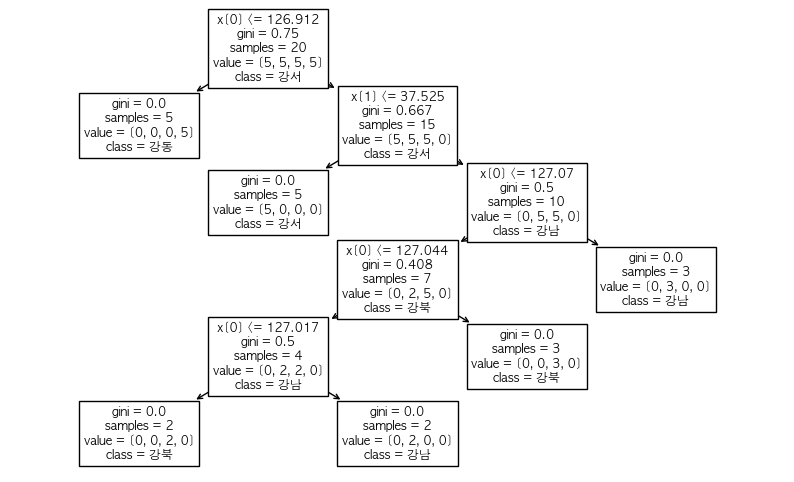

In [42]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,6))
plot_tree(
    tr_clf,
    class_names=test_df['label'].unique()
    
)
plt.show()

> gini (불순도)가 0이 될 때까지 진행됨